## DSP-37 CNN Cifar100 -Srilatha Donthi

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Activation,Dropout,InputLayer,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras import datasets,layers,models
from sklearn.metrics import multilabel_confusion_matrix,classification_report,confusion_matrix

In [2]:
from tensorflow.keras.datasets import cifar100


## Loading Dataset

In [3]:
cifar100.load_data()

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

## Training And Testing Dataset

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar100.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
x_train = x_train.reshape(50000,32,32,3).astype('float32')
x_test = x_test.reshape(10000,32,32,3).astype('float32')

In [10]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
x_train[3]

array([[[124., 194., 221.],
        [131., 202., 228.],
        [135., 206., 228.],
        ...,
        [149., 225., 236.],
        [143., 220., 234.],
        [136., 213., 230.]],

       [[121., 194., 220.],
        [128., 201., 225.],
        [134., 206., 228.],
        ...,
        [151., 224., 234.],
        [146., 222., 234.],
        [142., 217., 232.]],

       [[122., 197., 223.],
        [129., 204., 228.],
        [136., 208., 229.],
        ...,
        [156., 228., 236.],
        [153., 226., 237.],
        [148., 221., 235.]],

       ...,

       [[129.,  42.,  59.],
        [147.,  17.,  38.],
        [151.,  16.,  30.],
        ...,
        [234., 231., 225.],
        [238., 240., 233.],
        [224., 197., 201.]],

       [[150.,  21.,  40.],
        [152.,  17.,  33.],
        [156.,  25.,  36.],
        ...,
        [227., 225., 221.],
        [231., 241., 233.],
        [231., 236., 230.]],

       [[147.,  12.,  25.],
        [146.,  11.,  23.],
        [156.,  

In [12]:
y_train[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [13]:
y_test[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## Normalising Data

In [14]:
#normalizing train data

x_train=x_train/255.0

x_train.shape


(50000, 32, 32, 3)

In [15]:
#normalizing test data

x_test=x_test/255.0

x_test.shape

(10000, 32, 32, 3)

## Visualising the Data

In [16]:
import matplotlib.pyplot as plt

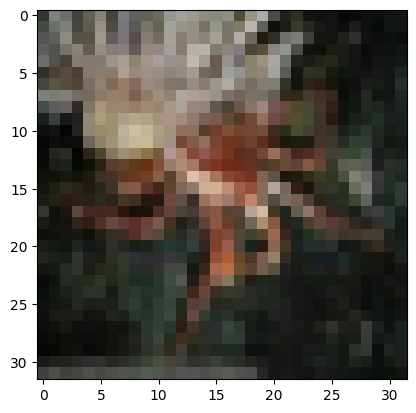

In [17]:
plt.imshow(x_test[100])

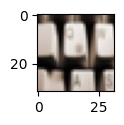

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,1))
plt.imshow(x_train[15])

## ModelBuilding

In [19]:
model  = tf.keras.models.Sequential()

### First Layers

In [20]:
model.add(InputLayer(input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(100,activation ='relu'))
model.add(Dense(50,activation ='relu'))
model.add(Dense(100,activation ='softmax'))


In [21]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [23]:
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 27s 16ms/step - loss: 3.8927 - accuracy: 0.1024
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 3.2793 - accuracy: 0.2059
Epoch 3/5
1563/1563 [==============================] - 27s 18ms/step - loss: 3.0402 - accuracy: 0.2532
Epoch 4/5
1563/1563 [==============================] - 26s 17ms/step - loss: 2.8799 - accuracy: 0.2803
Epoch 5/5
1563/1563 [==============================] - 31s 20ms/step - loss: 2.7554 - accuracy: 0.3070


In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.8399 - accuracy: 0.2971


[2.839890480041504, 0.2971000075340271]

In [25]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.79469243e-05, 3.58500220e-05, 3.29663599e-04, 1.67980287e-02,
        3.20136454e-03, 2.59508565e-03, 2.25466880e-04, 1.00096427e-02,
        1.89367067e-02, 3.03219794e-03, 5.18238870e-04, 3.88665445e-04,
        3.33465189e-02, 6.27315778e-04, 2.93583260e-04, 4.35521780e-03,
        1.00262370e-03, 2.04090364e-02, 4.55603981e-03, 3.84812034e-03,
        3.78861238e-04, 1.57018629e-04, 1.08913414e-03, 2.41352301e-02,
        2.24774964e-02, 4.45806701e-03, 1.26195455e-03, 4.55352059e-03,
        4.53707209e-04, 6.30955072e-03, 6.55391291e-02, 3.19644529e-03,
        8.01434834e-03, 6.83814799e-03, 4.18653042e-04, 9.12974137e-05,
        1.18851967e-04, 6.20085699e-03, 8.31353292e-03, 2.25174241e-02,
        2.02852264e-02, 3.18016740e-04, 4.80844406e-04, 8.03209623e-05,
        7.26064481e-03, 7.50289066e-04, 7.96210370e-04, 1.84615632e-03,
        3.28848459e-04, 6.17186800e-02, 1.01584278e-03, 3.88235349e-04,
        3.04359826e-04, 3.42095382e-06, 5.37316431e-04, 2.898484

In [26]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [27]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))
print("Classification Report: \n", classification_report(y_test_arg,y_pred))

313/313 [==============================] - 1s 4ms/step
Confusion Matrix
[[65  2  0 ...  0  0  0]
 [ 2 37  1 ...  1  1  0]
 [ 2  1 18 ...  2  8  1]
 ...
 [ 0  0  1 ... 50  0  1]
 [ 1  0  7 ...  3 13  0]
 [ 0  2  0 ...  2  1 13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.65      0.55       100
           1       0.33      0.37      0.35       100
           2       0.19      0.18      0.18       100
           3       0.10      0.02      0.03       100
           4       0.11      0.10      0.11       100
           5       0.21      0.18      0.19       100
           6       0.28      0.36      0.31       100
           7       0.39      0.33      0.36       100
           8       0.36      0.24      0.29       100
           9       0.54      0.36      0.43       100
          10       0.22      0.06      0.09       100
          11       0.28      0.09      0.14       100
          12       0.30      0.13      0.18 